<a href="https://colab.research.google.com/github/Uchimakali33/Maatram_project/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import files
uploaded=files.upload()

Saving maatram_traindata.csv to maatram_traindata.csv


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("maatram_traindata.csv")
df

,Family_Income_Monthly,Current_CGPA,Student_Motivation,Physical_Verification_Score,Siblings_Count,Parents_Employed,Dropout_Likelihood,School_Type_Public,Gender
0,1.106235,0.999238,-0.893153,0.320754,0.003065,-0.107050,1,1.0,0
1,-0.456729,-0.814045,1.499096,-0.805596,0.003065,1.272481,0,0.0,0
2,-0.979508,0.364869,1.499096,-0.805596,-0.694659,-0.107050,0,1.0,0
3,-1.276506,-0.117924,0.132097,1.447104,1.398512,-1.486581,1,1.0,1
4,-0.373078,1.105901,-1.576653,-1.368771,0.003065,-0.107050,1,0.0,0
...,...,...,...,...,...,...,...,...,...
678,-1.095084,0.426622,-1.234903,-0.805596,0.003065,-0.107050,1,1.0,1
679,-1.492310,0.426622,-0.209653,-0.805596,-0.694659,1.272481,1,1.0,0
680,-0.003327,-0.763520,0.473846,-1.368771,1.398512,-0.107050,1,0.0,0
681,-0.840755,-1.369819,1.157346,-0.242421,1.398512,-0.107050,1,1.0,0


In [56]:
target=df['Dropout_Likelihood']
features=df.drop(columns=["Dropout_Likelihood"])
features

,Family_Income_Monthly,Current_CGPA,Student_Motivation,Physical_Verification_Score,Siblings_Count,Parents_Employed,School_Type_Public,Gender
0,1.106235,0.999238,-0.893153,0.320754,0.003065,-0.107050,1.0,0
1,-0.456729,-0.814045,1.499096,-0.805596,0.003065,1.272481,0.0,0
2,-0.979508,0.364869,1.499096,-0.805596,-0.694659,-0.107050,1.0,0
3,-1.276506,-0.117924,0.132097,1.447104,1.398512,-1.486581,1.0,1
4,-0.373078,1.105901,-1.576653,-1.368771,0.003065,-0.107050,0.0,0
...,...,...,...,...,...,...,...,...
678,-1.095084,0.426622,-1.234903,-0.805596,0.003065,-0.107050,1.0,1
679,-1.492310,0.426622,-0.209653,-0.805596,-0.694659,1.272481,1.0,0
680,-0.003327,-0.763520,0.473846,-1.368771,1.398512,-0.107050,0.0,0
681,-0.840755,-1.369819,1.157346,-0.242421,1.398512,-0.107050,1.0,0


In [83]:

from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=40)

model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
score=r2_score(y_test,pred)
score

0.0473732667540937

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,f1_score
model2=LogisticRegression()
model2.fit(x_train,y_train)
pred2=model2.predict(x_test)
score2=accuracy_score(y_test,pred2)
score2

0.5547445255474452

In [96]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=40,random_state=42)
model3.fit(x_train,y_train)
scr=model3.score(x_test,y_test)
pred3=model3.predict(x_test)
scr


0.8759124087591241

<Axes: >

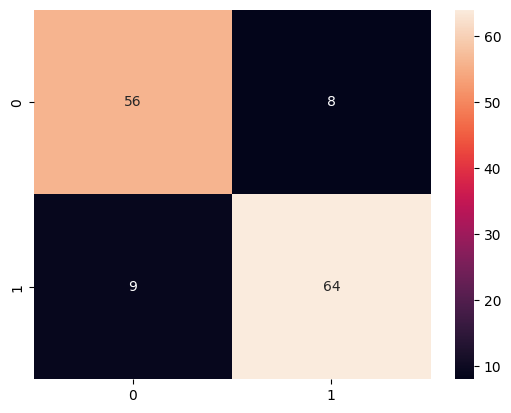

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(y_test,pred3)
sn.heatmap(cm,annot=True)


In [98]:
import joblib

joblib.dump(model3,"model.pkl")


['model.pkl']